<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

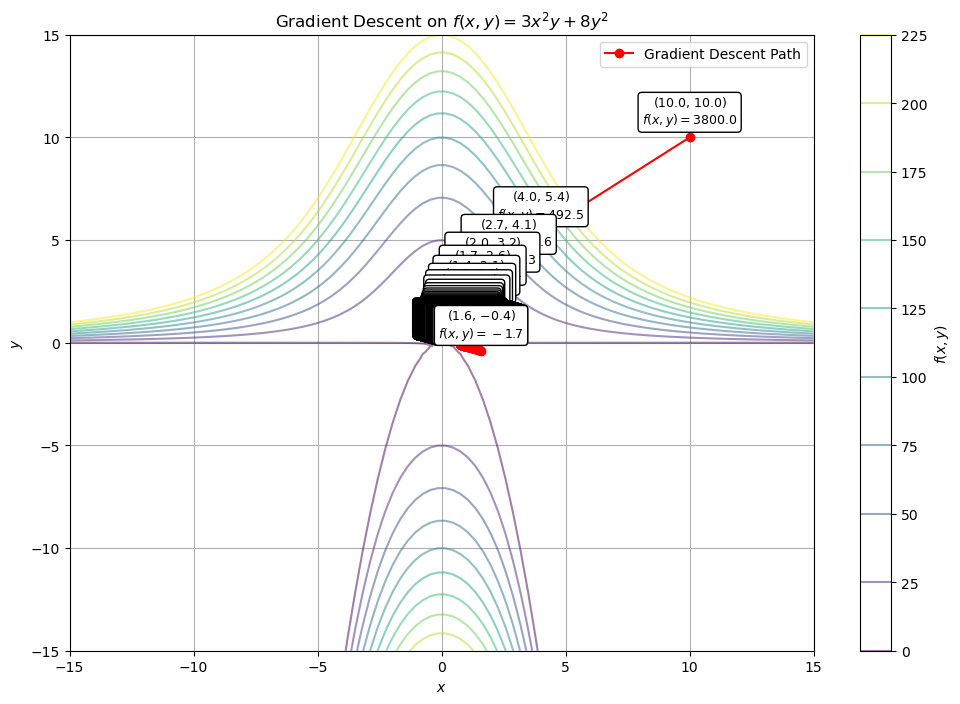

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Math

# Define symbols
x, y = sp.symbols('x y')

# Define the function
f = 3*x**2*y + 8*y**2 

# Compute gradients
grad_f_x = sp.diff(f, x)
grad_f_y = sp.diff(f, y)

# Compute second-order gradients
grad_f_xx = sp.diff(grad_f_x, x)
grad_f_xy = sp.diff(grad_f_x, y)
grad_f_yx = sp.diff(grad_f_y, x)
grad_f_yy = sp.diff(grad_f_y, y)

grad_f_x_func = sp.lambdify((x, y), grad_f_x, 'numpy')
grad_f_y_func = sp.lambdify((x, y), grad_f_y, 'numpy')

def gradient_descent(starting_point, learning_rate, num_iterations):
    x_current, y_current = starting_point
    x_history = [x_current]
    y_history = [y_current]
    f_history = [f.subs({x: x_current, y: y_current})]
    
    for _ in range(num_iterations):
        grad_x = grad_f_x_func(x_current, y_current)
        grad_y = grad_f_y_func(x_current, y_current)
        
        # Check for overflow or very large values
        if np.isinf(grad_x) or np.isnan(grad_x) or np.isinf(grad_y) or np.isnan(grad_y):
            print("Gradient overflow or NaN detected. Adjusting learning rate or check function.")
            break
        
        x_current = x_current - learning_rate * grad_x
        y_current = y_current - learning_rate * grad_y
        
        x_history.append(x_current)
        y_history.append(y_current)
        f_history.append(f.subs({x: x_current, y: y_current}))
    
    return x_history, y_history, f_history

# Parameters
starting_point = (10, 10)  # Starting point for gradient descent
learning_rate = 0.01        # Adjusted learning rate
num_iterations = 100       # Number of iterations

# Run Gradient Descent
x_history, y_history, f_history = gradient_descent(starting_point, learning_rate, num_iterations)

x_history = np.array(x_history)
y_history = np.array(y_history)
f_history = np.array(f_history)

grad_f_x_latex = sp.latex(grad_f_x)
grad_f_y_latex = sp.latex(grad_f_y)
grad_f_xx_latex = sp.latex(grad_f_xx)
grad_f_xy_latex = sp.latex(grad_f_xy)
grad_f_yx_latex = sp.latex(grad_f_yx)
grad_f_yy_latex = sp.latex(grad_f_yy)

display(Math(f'\\frac{{\\partial f}}{{\\partial x}} = {grad_f_x_latex}'))
display(Math(f'\\frac{{\\partial f}}{{\\partial y}} = {grad_f_y_latex}'))
display(Math(f'\\frac{{\\partial^2 f}}{{\\partial x^2}} = {grad_f_xx_latex}'))
display(Math(f'\\frac{{\\partial^2 f}}{{\\partial x \\partial y}} = {grad_f_xy_latex}'))
display(Math(f'\\frac{{\\partial^2 f}}{{\\partial y \\partial x}} = {grad_f_yx_latex}'))
display(Math(f'\\frac{{\\partial^2 f}}{{\\partial y^2}} = {grad_f_yy_latex}'))

# Plotting
plt.figure(figsize=(12, 8))

x_values = np.linspace(-15, 15, 100)
y_values = np.linspace(-15, 15, 100)
X, Y = np.meshgrid(x_values, y_values)
Z = X**2 * Y + Y**2
plt.contour(X, Y, Z, levels=np.linspace(0, 225, 10), cmap='viridis', alpha=0.5)

plt.plot(x_history, y_history, 'o-', color='red', label='Gradient Descent Path')

for i, (x_val, y_val, f_val) in enumerate(zip(x_history, y_history, f_history)):
    plt.annotate(
        f'(${x_val:.1f}$, ${y_val:.1f}$)\n$f(x, y)={f_val:.1f}$',
        (x_val, y_val),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'),
        fontsize=9
    )

# Using LaTeX in titles and labels
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient Descent on $f(x, y) = 3x^2 y + 8y^2$')
plt.legend()
plt.colorbar(label=r'$f(x, y)$')
plt.grid(True)
plt.show()

In [21]:
import numpy as np
import sympy as sp
import plotly.graph_objects as go
from IPython.display import Math, display

# Define symbols
x, y = sp.symbols('x y')

# Define the function
f = 2*x**2*y + x*y**2 

grad_f_x = sp.diff(f, x)
grad_f_y = sp.diff(f, y)

grad_f_xx = sp.diff(grad_f_x, x)
grad_f_xy = sp.diff(grad_f_x, y)
grad_f_yx = sp.diff(grad_f_y, x)
grad_f_yy = sp.diff(grad_f_y, y)

grad_f_x_func = sp.lambdify((x, y), grad_f_x, 'numpy')
grad_f_y_func = sp.lambdify((x, y), grad_f_y, 'numpy')

display(Math(f"f(x, y) = {sp.latex(f)}"))
display(Math(f"\\frac{{\\partial f}}{{\\partial x}} = {sp.latex(grad_f_x)}"))
display(Math(f"\\frac{{\\partial f}}{{\\partial y}} = {sp.latex(grad_f_y)}"))
display(Math(f"\\frac{{\\partial^2 f}}{{\\partial x^2}} = {sp.latex(grad_f_xx)}"))
display(Math(f"\\frac{{\\partial^2 f}}{{\\partial x \\partial y}} = {sp.latex(grad_f_xy)}"))
display(Math(f"\\frac{{\\partial^2 f}}{{\\partial y \\partial x}} = {sp.latex(grad_f_yx)}"))
display(Math(f"\\frac{{\\partial^2 f}}{{\\partial y^2}} = {sp.latex(grad_f_yy)}"))

def gradient_descent(starting_point, learning_rate, num_iterations):
    x_current, y_current = starting_point
    x_history = [x_current]
    y_history = [y_current]
    f_history = [f.subs({x: x_current, y: y_current})]
    
    for _ in range(num_iterations):
        grad_x = grad_f_x_func(x_current, y_current)
        grad_y = grad_f_y_func(x_current, y_current)
        
        # Check for overflow or very large values
        if np.isinf(grad_x) or np.isnan(grad_x) or np.isinf(grad_y) or np.isnan(grad_y):
            print("Gradient overflow or NaN detected. Adjusting learning rate or check function.")
            break
        
        x_current = x_current - learning_rate * grad_x
        y_current = y_current - learning_rate * grad_y
        
        x_history.append(x_current)
        y_history.append(y_current)
        f_history.append(f.subs({x: x_current, y: y_current}))
    
    return x_history, y_history, f_history

# Parameters
starting_point = (10, 10)  # Starting point for gradient descent
learning_rate = 0.01        # Adjusted learning rate
num_iterations = 100       # Number of iterations


x_history, y_history, f_history = gradient_descent(starting_point, learning_rate, num_iterations)

# Create Plotly figure
fig = go.Figure()

# Plot function contour
x_values = np.linspace(-15, 15, 100)
y_values = np.linspace(-15, 15, 100)
X, Y = np.meshgrid(x_values, y_values)
Z = 2*X**2*Y + X*Y**2
fig.add_trace(go.Contour(
    x=x_values, y=y_values, z=Z,
    colorscale='Viridis',
    showscale=True,
    colorbar=dict(title='f(x, y)')
))

# Plot gradient descent path
fig.add_trace(go.Scatter(
    x=x_history,
    y=y_history,
    mode='markers+lines',
    marker=dict(color='red', size=8),
    line=dict(color='red', width=2),
    text=[f'({x_val:.1f}, {y_val:.1f})<br>f(x, y)={f_val:.1f}' for x_val, y_val, f_val in zip(x_history, y_history, f_history)],
    hoverinfo='text'
))

# LaTeX Title for Plotly Figure
latex_title = r"Gradient Descent on $f(x, y) = 2x^2 y + x y^2$"

# Display LaTeX Title
display(Math(latex_title))

# Update layout
fig.update_layout(
    title=latex_title,
    title_font=dict(family="Arial", size=20, color="RebeccaPurple"),
    xaxis_title='x',
    yaxis_title='y',
    autosize=True
)

# Show the plot
fig.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>